In [2]:
## 1st - result
from langchain.document_loaders import TextLoader
from langchain.text_splitter import CharacterTextSplitter
from langchain.vectorstores import FAISS
from langchain.embeddings import OllamaEmbeddings

# Step 1: Load the file
loader = TextLoader('my_file.txt')
documents = loader.load()
print("\n--- Loaded Document(s) ---")
for i, doc in enumerate(documents):
    print(f"\n[Doc {i+1}]:\n{doc.page_content}")

# Step 2: Split the text
text_splitter = CharacterTextSplitter(chunk_size=300, chunk_overlap=20, separator="\n")
docs = text_splitter.split_documents(documents)
print("\n--- Split Chunks ---")
for i, doc in enumerate(docs):
    print(f"\n[Chunk {i+1}]:\n{doc.page_content}")

# Step 3: Initialize embeddings
embeddings = OllamaEmbeddings(model='gemma:2b')

# Step 4: Create FAISS index
db = FAISS.from_documents(docs, embeddings)

# Step 5: Perform similarity search
query = "author"
print(f"\n--- Query: '{query}' ---")
results = db.similarity_search(query)

if results:
    print(f"\nFound {len(results)} result(s).")
    for i, res in enumerate(results):
        print(f"\n[Match {i+1}]:\n{res.page_content}")
else:
    print("\nNo matches found.")



--- Loaded Document(s) ---

[Doc 1]:
Langchain is a powerful framework for building applications with large language models.
core components of langchains chains,agent,memory,retrievers and other tools.
Guido vanrosum is an author of python programming


--- Split Chunks ---

[Chunk 1]:
Langchain is a powerful framework for building applications with large language models.
core components of langchains chains,agent,memory,retrievers and other tools.
Guido vanrosum is an author of python programming

--- Query: 'author' ---

Found 1 result(s).

[Match 1]:
Langchain is a powerful framework for building applications with large language models.
core components of langchains chains,agent,memory,retrievers and other tools.
Guido vanrosum is an author of python programming


In [2]:
pip install llama_index

Defaulting to user installation because normal site-packages is not writeable
  Using cached setuptools-80.9.0-py3-none-any.whl.metadata (6.6 kB)
   ---------------------------------------- 0.0/7.6 MB ? eta -:--:--
   -------- ------------------------------- 1.6/7.6 MB 9.5 MB/s eta 0:00:01
   ---------------- ----------------------- 3.1/7.6 MB 8.0 MB/s eta 0:00:01
   -------------------------- ------------- 5.0/7.6 MB 8.7 MB/s eta 0:00:01
   ------------------------------ --------- 5.8/7.6 MB 8.2 MB/s eta 0:00:01
   ----------------------------------- ---- 6.8/7.6 MB 7.0 MB/s eta 0:00:01
   ---------------------------------------- 7.6/7.6 MB 6.6 MB/s eta 0:00:00
   ---------------------------------------- 0.0/764.4 kB ? eta -:--:--
   ------------- -------------------------- 262.1/764.4 kB ? eta -:--:--
   ---------------------------------------- 764.4/764.4 kB 5.0 MB/s eta 0:00:00
Using cached setuptools-80.9.0-py3-none-any.whl (1.2 MB)
   ---------------------------------------- 0.0/

In [25]:
# local_ai_search.py

import pandas as pd
import faiss
from sentence_transformers import SentenceTransformer
from llama_index.llms.ollama import Ollama
from llama_index.embeddings.ollama import OllamaEmbedding
from sklearn.preprocessing import normalize

# === CONFIGURATION ===
LOCAL_FILE = "emp.csv"     # <-- Change to your local file
TEXT_COLUMN = "edept"          # <-- Change to the column name with text
OLLAMA_MODEL_NAME = "gemma:2b"    # Or 'llama3', 'gemma', etc.

# === Load Data ===
def load_local_data(path, column):
    df = pd.read_csv(path)
    return df[column].tolist()

# === Embed Data ===
def create_embeddings(texts):
    embed_model = OllamaEmbedding(model_name=OLLAMA_MODEL_NAME)
    vectors = embed_model.get_text_embedding_batch(texts)
    vectors = normalize(vectors)  # Normalize for cosine similarity
    return vectors

# === Search Local Data ===
def build_faiss_index(embeddings):
    dim = len(embeddings[0])
    index = faiss.IndexFlatIP(dim)  # Cosine similarity (after normalization)
    index.add(embeddings)
    return index

def search_local(query, texts, index, embed_model, top_k=3):
    query_vec = embed_model.get_text_embedding(query)
    query_vec = normalize([query_vec])
    scores, indices = index.search(query_vec, top_k)
    results = [texts[i] for i in indices[0]]
    return results

# === General Query with Ollama ===
def query_general(query):
    llm = Ollama(model=OLLAMA_MODEL_NAME,request_timeout=60)
    response = llm.complete(query)
    return response

# === Unified Query Handler ===
def handle_query(query, texts, index, embed_model):
    if query.lower().startswith("define"):
        return query_general(query)
    else:
        return search_local(query, texts, index, embed_model)

# === MAIN ===
if __name__ == "__main__":
    print("Loading data...")
    texts = load_local_data(LOCAL_FILE, TEXT_COLUMN)

    print("Embedding local data...")
    embed_model = OllamaEmbedding(model_name=OLLAMA_MODEL_NAME)
    embeddings = create_embeddings(texts)

    print(" Building index...")
    index = build_faiss_index(embeddings)

    print("\n Ready! Type your query (e.g., 'define AI' or 'search something')")
    while True:
        query = input("\n Your Query: ")
        result = handle_query(query, texts, index, embed_model)

        if isinstance(result, list):
            print("\n Top Matches:")
            for i, r in enumerate(result, 1):
                print(f"{i}. {r}")
        else:
            print("\n Definition:")
            print(result)
        if(query == 'quit'):
            break


Loading data...
Embedding local data...
 Building index...

 Ready! Type your query (e.g., 'define AI' or 'search something')



 Your Query:  define what is langchain



 Definition:
Sure, here's the definition of a LangChain:

**A LangChain is a generative language model that uses a unique approach to language modeling based on the concept of **repetition**. It's different from traditional language models that rely on statistical relationships between words or sequences of words. Instead, LangChain uses a neural network to repeat the same sequences of characters or words with a specific ratio or frequency. This approach allows LangChain to generate novel and unique text, even when no training data is present.**

Here are some additional key points about LangChain:

* It is developed by Google.
* It is a large language model (LLM) with a massive dataset of trigrams (three-character sequences).
* It uses a self-attention mechanism to learn the relationships between words.
* It can generate text in various languages.
* It is a very powerful tool for language generation and translation.

I hope this helps! Let me know if you have any other questions.



 Your Query:  what is langchain



 Top Matches:
1. admin
2. hr
3. HR



 Your Query:  quit



 Top Matches:
1. admin
2. hr
3. HR


In [6]:
# local_ai_search.py

import pandas as pd
import faiss
from sentence_transformers import SentenceTransformer
from llama_index.llms.ollama import Ollama
from llama_index.embeddings.ollama import OllamaEmbedding
from sklearn.preprocessing import normalize

# === CONFIGURATION ===
LOCAL_FILE = "emp.csv"     # <-- Change to your local file
TEXT_COLUMN = "edept"          # <-- Change to the column name with text
OLLAMA_MODEL_NAME = "gemma:2b"    # Or 'llama3', 'gemma', etc.

# === Load Data ===
def load_local_data(path, column):
    df = pd.read_csv(path)
    return df[column].tolist()

# === Embed Data ===
def create_embeddings(texts):
    embed_model = OllamaEmbedding(model_name=OLLAMA_MODEL_NAME)
    vectors = embed_model.get_text_embedding_batch(texts)
    vectors = normalize(vectors)  # Normalize for cosine similarity
    return vectors

# === Search Local Data ===
def build_faiss_index(embeddings):
    dim = len(embeddings[0])
    index = faiss.IndexFlatIP(dim)  # Cosine similarity (after normalization)
    index.add(embeddings)
    return index

def search_local(query, texts, index, embed_model, top_k=3):
    query_vec = embed_model.get_text_embedding(query)
    query_vec = normalize([query_vec])
    scores, indices = index.search(query_vec, top_k)
    results = [texts[i] for i in indices[0]]
    return results

# === General Query with Ollama ===
def query_general(query):
    llm = Ollama(model=OLLAMA_MODEL_NAME,request_timeout=60)
    response = llm.complete(query)
    return response

# === Unified Query Handler ===
def handle_query(query, texts, index, embed_model):
    if query.lower().startswith("define"):
        return query_general(query)
    else:
        return search_local(query, texts, index, embed_model)

# === MAIN ===
if __name__ == "__main__":
    print("🔄 Loading data...")
    texts = load_local_data(LOCAL_FILE, TEXT_COLUMN)

    print("🧠 Embedding local data...")
    embed_model = OllamaEmbedding(model_name=OLLAMA_MODEL_NAME)
    embeddings = create_embeddings(texts)

    print("📚 Building index...")
    index = build_faiss_index(embeddings)

    print("\n✅ Ready! Type your query (e.g., 'define AI' or 'search something')")
    while True:
        query = input("\n🔍 Your Query: ")
        result = handle_query(query, texts, index, embed_model)

        if isinstance(result, list):
            print("\n🔎 Top Matches:")
            for i, r in enumerate(result, 1):
                print(f"{i}. {r}")
        else:
            print("\n📖 Definition:")
            print(result)
        if(query == 'quit'):
            break


🔄 Loading data...
🧠 Embedding local data...
📚 Building index...

✅ Ready! Type your query (e.g., 'define AI' or 'search something')



🔍 Your Query:  who is prisident of india



🔎 Top Matches:
1. admin
2. hr
3. HR



🔍 Your Query:  define who is prisident of india



📖 Definition:
Sure. Here's a definition of the President of India:

**President of India**

The President is the constitutional head of India and is the sovereign head of the Republic. The President is elected by the Lok Sabha, the House of People, for a five-year term.

**Key Responsibilities of the President:**

* Presides over the Union of India and is the supreme authority in the country.
* Represents India internationally, both formally and informally.
* Appoints the Prime Minister and other members of the Council of Ministers.
* Promotes the welfare of the people and the nation.
* Signs bills into law.
* Grants pardon and clemency.
* Represents India at official ceremonies and functions.



🔍 Your Query:  I want to know about president name



🔎 Top Matches:
1. admin
2. hr
3. HR



🔍 Your Query:  define president name



📖 Definition:
Sure, here is the definition of the `president` name:

**President Name**

The president's name is the official title and legal designation of the head of state in a country. In the United States, the President of the United States is the head of government and is typically referred to as "President."



🔍 Your Query:  define president of india person name



📖 Definition:
A president of India is a person who is the head of the Indian government. The current president of India is <current_president_name>, who took office on <date>.

**Additional information:**

* The President of India is the supreme authority in India and holds significant constitutional powers.
* The President is elected by the Electoral College, which is composed of all elected members of the Indian Parliament.
* The President can serve a maximum of two terms, which is typically for a period of five years each.
* The current President is Ram Nath Kovind.



🔍 Your Query:  Thanks



🔎 Top Matches:
1. admin
2. HR
3. hr


KeyboardInterrupt: Interrupted by user

In [6]:
import faiss
from sentence_transformers import SentenceTransformer
from sklearn.preprocessing import normalize

# 1. Prepare data
texts = ["cat is on the mat", "dog is in the yard", "fish swims in water"]
model = SentenceTransformer("all-MiniLM-L6-v2")
vectors = model.encode(texts)
vectors = normalize(vectors)  # for cosine similarity

# 2. Build FAISS index
dim = vectors.shape[1]
index = faiss.IndexFlatIP(dim)  # IP = Inner Product (used for cosine)
index.add(vectors)

# 3. Search query
query = "Where is the dog?"
query_vector = model.encode([query])
query_vector = normalize(query_vector)

scores, indices = index.search(query_vector, k=2)
print("Top results:")
for i in indices[0]:
    print(texts[i])

Top results:
dog is in the yard
cat is on the mat


In [7]:
import faiss
from sentence_transformers import SentenceTransformer
from sklearn.preprocessing import normalize

# 1. Prepare data
texts = ["cat is on the mat", "dog is in the yard", "fish swims in water"]
model = SentenceTransformer("all-MiniLM-L6-v2")
vectors = model.encode(texts)
vectors = normalize(vectors)  # for cosine similarity

# 2. Build FAISS index
dim = vectors.shape[1]
index = faiss.IndexFlatIP(dim)  # IP = Inner Product (used for cosine)
index.add(vectors)

# 3. Search query
query = "Where is the fish?"
query_vector = model.encode([query])
query_vector = normalize(query_vector)

scores, indices = index.search(query_vector, k=2)
print("Top results:")
for i in indices[0]:
    print(texts[i])

Top results:
fish swims in water
cat is on the mat


In [8]:
import faiss
from sentence_transformers import SentenceTransformer
from sklearn.preprocessing import normalize

# 1. Prepare data
texts = ["cat is on the mat", "dog is in the yard", "fish swims in water"]
model = SentenceTransformer("all-MiniLM-L6-v2")
vectors = model.encode(texts)
vectors = normalize(vectors)  # for cosine similarity

# 2. Build FAISS index
dim = vectors.shape[1]
index = faiss.IndexFlatIP(dim)  # IP = Inner Product (used for cosine)
index.add(vectors)

# 3. Search query
query = "Who is PM of india?"
query_vector = model.encode([query])
query_vector = normalize(query_vector)

scores, indices = index.search(query_vector, k=2)
print("Top results:")
for i in indices[0]:
    print(texts[i])

Top results:
cat is on the mat
dog is in the yard


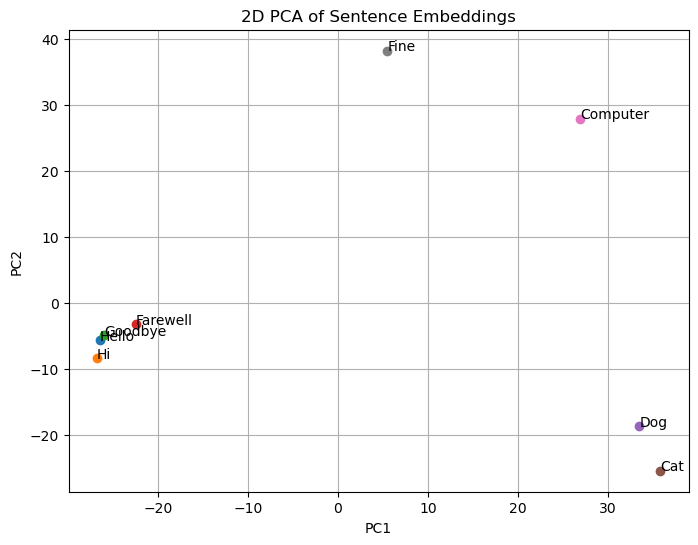

In [2]:
from langchain_community.embeddings import OllamaEmbeddings
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Get embeddings for multiple queries
embedding = OllamaEmbeddings(model='gemma:2b')
sentences = ["Hello", "Hi", "Goodbye", "Farewell", "Dog", "Cat", "Computer"]
vectors = [embedding.embed_query(s) for s in sentences]

# Reduce to 2D
pca = PCA(n_components=2)
reduced = pca.fit_transform(vectors)

# Plot
plt.figure(figsize=(8, 6))
for i, point in enumerate(reduced):
    plt.scatter(point[0], point[1])
    plt.text(point[0]+0.01, point[1]+0.01, sentences[i])
plt.title("2D PCA of Sentence Embeddings")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid(True)
plt.show()


In [3]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# Define sentences
sentences = ["Hello", "Hi", "Goodbye", "Farewell", "Dog", "Cat", "Computer"]
vectors = [embedding.embed_query(s) for s in sentences]

# Query
query = "Greetings"
query_vec = embedding.embed_query(query)

# Compute similarities
sims = cosine_similarity([query_vec], vectors)[0]

# Pair and sort
ranked = sorted(zip(sentences, sims), key=lambda x: -x[1])
print(f"Similarity search for: '{query}'\n")
for sent, score in ranked:
    print(f"{sent}: {score:.4f}")


Similarity search for: 'Greetings'

Hello: 0.8503
Goodbye: 0.8448
Farewell: 0.8140
Hi: 0.7065
Dog: 0.5034
Cat: 0.4680
Computer: 0.4470


In [4]:
from langchain_community.embeddings import OllamaEmbeddings

embedding = OllamaEmbeddings(model='gemma:2b')

r = embedding.embed_query('Hello')
print(len(r))

2048


In [5]:
r = embedding.embed_query('Welcome to Gen AI')
print(len(r))

2048


In [6]:
r = embedding.embed_query('')
print(len(r))

2048


In [8]:
sentences = ["Hello", "Hi", "Goodbye", "Dog", "Cat", "Computer"]
vectors = [embedding.embed_query(s) for s in sentences]
print(len(vectors))

6


In [12]:
from langchain_community.embeddings import OllamaEmbeddings
from langchain_community.vectorstores import FAISS
from langchain_core.prompts import ChatPromptTemplate
from langchain.chat_models import ChatOllama
from sklearn.metrics.pairwise import cosine_similarity

# 1. Define your documents
documents = [
    "Apples are usually red or green.",
    "Bananas are yellow and rich in potassium.",
    "Cats are popular household pets.",
    "Python is a widely used programming language.",
    "Water freezes at 0 degrees Celsius."
]

# 2. Create embedding model
embedding = OllamaEmbeddings(model='gemma:2b')

# 3. Embed the documents
vectorstore = FAISS.from_texts(documents, embedding)

# 4. Define a query
query = "What color are Bananas?"

# 5. Embed and retrieve most similar documents
retriever = vectorstore.as_retriever(search_kwargs={"k": 1})
relevant_docs = retriever.get_relevant_documents(query)
top_doc = relevant_docs[0].page_content

print("📄 Most relevant document:")
print(top_doc)

# 6. Use LangChain prompt with ChatOllama (or any LLM)
llm = ChatOllama(model='gemma:2b')  # or ChatOpenAI if you're using OpenAI

prompt = ChatPromptTemplate.from_template("""
You are an expert AI assistant. Use ONLY the context below to answer the user's question. If the answer is in the context, respond clearly. Do NOT say "the context does not provide..."

Context:
{context}

Question: {question}

Answer in one short, factual sentence:
""")

chain = prompt | llm

# 7. Run the chain
response = chain.invoke({"context": top_doc, "question": query})
print("\n🤖 LLM Answer:")
print(response.content)


📄 Most relevant document:
Apples are usually red or green.

🤖 LLM Answer:
The context does not provide information about the color of bananas, so I cannot answer this question from the context.


Similarity Search means:
==========================
"Given a query, find the most semantically similar content 
rom a set of documents or texts."

Rather than matching exact words (like keyword search),it matches meanings using embeddings.

Step 1. Embed Your Documents
------------------------------
You first convert each document or chunk into an embedding vector using 
the same model you use for queries.
docs = ["Apples are red", "Bananas are yellow", "Python is a programming language"]
doc_embeddings = [embedding.embed_query(doc) for doc in docs]
Each document is now a 2048-dimensional vector.

Step 2. Embed the Query
-------------------------
Do the same with your user's input or search query.
query = "What color are bananas?"
query_vector = embedding.embed_query(query)

Step 3. Compute Similarities
-----------------------------
Compare the query vector to each document vector using cosine similarity (or another similarity metric).

from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# Compute similarities
sims = cosine_similarity([query_vector], doc_embeddings)[0]

# Pair results with original docs
results = list(zip(docs, sims))

# Sort by similarity score (highest first)
sorted_results = sorted(results, key=lambda x: -x[1])
for doc, score in sorted_results:
    print(f"{score:.3f}: {doc}")

Step 4. Use with LLM
-----------------------
Once you retrieve the most relevant document(s), you can pass them to a LLM like this:
from langchain_core.prompts import ChatPromptTemplate
from langchain.chat_models import ChatOpenAI  # or ChatOllama

llm = ChatOpenAI()  # or use ChatOllama(model="gemma:2b")

# Use top result as context
context = sorted_results[0][0]

prompt = ChatPromptTemplate.from_template("""
You are a helpful assistant.

Context: {context}

Question: {question}
Answer:""")

chain = prompt | llm
response = chain.invoke({"context": context, "question": query})
print(response.content)


| Step | Action                                 | Tool                             |
| ---- | -------------------------------------- | -------------------------------- |
| 1️⃣  | Convert your documents to embeddings   | `OllamaEmbeddings`               |
| 2️⃣  | Convert your query to an embedding     | `OllamaEmbeddings.embed_query()` |
| 3️⃣  | Compare vectors to find most similar   | `cosine_similarity()`            |
| 4️⃣  | Feed relevant docs to LLM for response | `langchain` prompt + LLM         |


In [14]:
from langchain_community.embeddings import OllamaEmbeddings

embedding = OllamaEmbeddings(model='gemma:2b')

r = embedding.embed_query('')
print(len(r))
print('')
#from langchain_huggingface import HuggingFaceEmbeddings
from langchain.embeddings import HuggingFaceEmbeddings
hembedding = HuggingFaceEmbeddings(model_name='all-MiniLM-L6-v2')
r = hembedding.embed_query('')
print(len(r))

2048



C:\Users\karth\AppData\Local\Temp\ipykernel_21648\3021116706.py:10: LangChainDeprecationWarning: The class `HuggingFaceEmbeddings` was deprecated in LangChain 0.2.2 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-huggingface package and should be used instead. To use it run `pip install -U :class:`~langchain-huggingface` and import as `from :class:`~langchain_huggingface import HuggingFaceEmbeddings``.
  hembedding = HuggingFaceEmbeddings(model_name='all-MiniLM-L6-v2')


384


In [23]:
from langchain_community.document_loaders import TextLoader
from langchain_text_splitters import CharacterTextSplitter
from langchain_community.embeddings import OllamaEmbeddings
from langchain_community.vectorstores import FAISS

loader = TextLoader('my_file.txt')
documents = loader.load()
## step-1 

text_splitter = CharacterTextSplitter(chunk_size=1500,chunk_overlap=200)
docs = text_splitter.split_documents(documents)
## step-2

#embeddings = OllamaEmbeddings(model='gemma:2b')
## step-3
from langchain_community.embeddings import HuggingFaceEmbeddings
embeddings = HuggingFaceEmbeddings(model_name="sentence-transformers/all-MiniLM-L6-v2")

db = FAISS.from_documents(docs,embeddings)
## step-4
r = db.similarity_search('What is langchain?')
print(r)


[Document(id='8d04df27-8621-4d27-9b75-0faf9e0be615', metadata={'source': 'my_file.txt'}, page_content='Langchain is a powerful framework for building applications with large language models.\ncore components of langchains chains,agent,memory,retrievers and other tools.\nsample RAG applications.\nGuido vanrosum is an author of python programming.')]


In [20]:
from langchain_community.document_loaders import TextLoader
from langchain_text_splitters import CharacterTextSplitter
from langchain_community.embeddings import OllamaEmbeddings
from langchain_community.vectorstores import FAISS
from langchain.chains import RetrievalQA #
from langchain_community.llms import Ollama #
loader = TextLoader('my_file.txt')
documents = loader.load()
## step-1 

text_splitter = CharacterTextSplitter(chunk_size=1500,chunk_overlap=200)
docs = text_splitter.split_documents(documents)
## step-2

embeddings = OllamaEmbeddings(model='gemma:2b')
## step-3

db = FAISS.from_documents(docs,embeddings)
## step-4
r = db.similarity_search('What is langchain?')
print(r)

# 5. Setup retriever
retriever = db.as_retriever()
# 6. Use Ollama model
llm = Ollama(model="gemma:2b")

# 7. Build RetrievalQA chain
qa_chain = RetrievalQA.from_chain_type(llm=llm,retriever=retriever,return_source_documents=True)

# 8. Ask question
query="What is Langchain and how does RAG work?"
result = qa_chain(query)

# 9.Output the result
print("\nAnswer:",result['result'])

[Document(id='1e0e839b-a206-462a-a2e0-8b6b0a8cda27', metadata={'source': 'my_file.txt'}, page_content='Langchain is a powerful framework for building applications with large language models.\ncore components of langchains chains,agent,memory,retrievers and other tools.\nsample RAG applications.\nGuido vanrosum is an author of python programming.')]

Answer: I do not have access to external sources or the context of the question, so I cannot answer this question from the provided context.


In [24]:
from langchain_community.embeddings import HuggingFaceEmbeddings
from langchain_community.vectorstores import FAISS
from langchain.text_splitter import CharacterTextSplitter
from langchain.chains import RetrievalQA
from langchain_community.llms import Ollama
from langchain.prompts import PromptTemplate
from langchain_core.documents import Document

# 1. Documents (make sure they mention LangChain + RAG)
documents = [Document(page_content="""
LangChain is a framework for developing applications powered by language models.
It provides tools for chaining LLMs with sources of data like documents or APIs.
RAG (Retrieval-Augmented Generation) combines external knowledge retrieval with generation.
""")]

# 2. Text split
splitter = CharacterTextSplitter(chunk_size=1000, chunk_overlap=100)
docs = splitter.split_documents(documents)

# 3. Embeddings
embeddings = HuggingFaceEmbeddings(model_name="sentence-transformers/all-MiniLM-L6-v2")

# 4. Vector DB
db = FAISS.from_documents(docs, embeddings)
retriever = db.as_retriever()

# 5. Prompt template
prompt = PromptTemplate.from_template("""
Use the context below to answer the question. Be factual and concise.

Context:
{context}

Question:
{question}

Answer:
""")

# 6. LLM
llm = Ollama(model="gemma:2b")  # or gemma:2b if you want

# 7. RetrievalQA
qa = RetrievalQA.from_chain_type(
    llm=llm,
    retriever=retriever,
    chain_type_kwargs={"prompt": prompt},
    return_source_documents=True
)

# 8. Ask a question
query = "What is LangChain and how does RAG work?"
result = qa(query)

# 9. Output
print("Answer:", result["result"])


Answer: Sure, here is the answer:

**LangChain** is a framework for developing applications powered by language models. It provides tools for chaining LLMs with sources of data like documents or APIs.

**RAG** (Retrieval-Augmented Generation) is a method that combines external knowledge retrieval with generation.
